In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
% matplotlib inline

In [2]:
device=torch.cuda.device('cpu')

In [17]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu
processing=transforms.Compose([
        transforms.Resize(imsize),
        transforms.ToTensor()])
def loader(imagename):
    img=Image.open(imagename)
    t=processing(img)
    t=torch.squeeze(t,0)
    return t

### define a imshow Function to see whether load work well

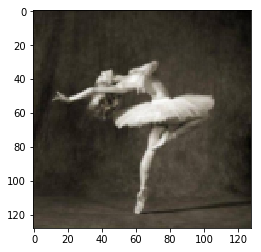

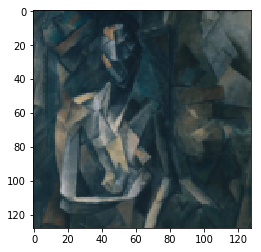

In [21]:
unloader=transforms.ToPILImage()

def imshow(t,title=None):
    img=unloader(t)
    plt.imshow(img)
    if title:plt.title(title)
content_Img=loader('styleImage/dancing.jpg')
style_Img=loader('styleImage/picasso.jpg')
plt.figure()
imshow(content_Img)
plt.figure()
imshow(style_Img)

In [22]:
class ContentLoss(nn.Module):
    def __init__(self,target):
        self.target=target.detech()
    def forward(self,X):
        self.loss=F.mse_loss(X,target)

### stype loss
using gram matrix:
     $$G(\overrightarrow{X})=\begin{pmatrix} 
        x_1^{2} &x_1x_2 &\cdots & x_1x_n \\
        x_2x_1  &x_2^2  &\cdots & x_2x_n \\ 
        \vdots  & \vdots  & \ddots & \vdots \\
        x_nx_1  & \cdots  & \cdots & x_n^2\\
        \end{pmatrix}
        $$

In [53]:
def gram_matrix(input):
    N,C,H,W=input.size()
    input=input.permute((0,2,3,1))
    input=input.view(N*H*W,C)
    G=torch.matmul(input.t(),input)
    return torch.div(G,N*C*W*H)
class StyleLoss(nn.Module):
    def __init__(self,target):
        self.target=gram_matrix(target.detech())
    def forward(self,X):
        X=gram_matrix(X)
        self.loss=F.mse_loss(X,self.target)

In [ ]:
## import vgg model
vgg=models.vgg19(pretrained=True)
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/zhangxk/.torch/models/vgg19-dcbb9e9d.pth
82903040it [00:39, 2043881.16it/s]

In [40]:
X=torch.tensor([10.0],requires_grad=True)
Y=torch.mul(X,2)
print(Y.requires_grad)
L=torch.sum(Y)
L.backward()
print(X.grad)
with torch.no_grad():
    X.sub_(X.grad)
print(X)
print(Z)

True
tensor([2.])
tensor([8.], requires_grad=True)
tensor([10.])


In [ ]:
X.tra